In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
file_path = "../data/multisocket/icon_summary_annotated.csv"

df = pd.read_csv(
    file_path,
    delimiter=",",
    encoding="utf-8",
    header=0
)

In [4]:
df.head()

,nodes,taskspernode,threadspertask,iconsteps,cpufreq,slurm_job_id,tpe,tlb,tce,tse,tte,tmpe,tmlb,tmce,tmse,tmte,tope,tolb,toce,tose,tote,epe0,elb0,ece0,ese0,ete0,empe0,emlb0,emce0,emse0,emte0,eope0,eolb0,eoce0,eose0,eote0,epe1,elb1,ece1,ese1,ete1,empe1,emlb1,emce1,emse1,emte1,eope1,eolb1,eoce1,eose1,eote1,total_time
0,1,4,24,1,1000000,61527200,0.803,0.925,0.868,0.949,0.915,0.901,0.934,0.965,0.995,0.970,0.892,0.990,0.900,0.954,0.944,0.816,0.966,0.845,0.942,0.897,0.918,0.993,0.925,0.957,0.966,0.889,0.972,0.914,0.984,0.928,0.833,0.932,0.894,0.997,0.897,0.927,0.959,0.967,1.001,0.966,0.899,0.973,0.924,0.995,0.928,86.962
1,1,4,24,1,1500000,61527201,0.785,0.952,0.825,0.925,0.892,0.887,0.962,0.922,0.977,0.943,0.886,0.989,0.895,0.946,0.946,0.811,0.959,0.845,0.969,0.873,0.938,0.992,0.945,0.982,0.962,0.865,0.967,0.894,0.986,0.907,0.817,0.940,0.869,0.996,0.873,0.938,0.975,0.962,1.000,0.962,0.871,0.964,0.903,0.996,0.907,66.942
2,1,4,24,1,2000000,61527202,0.823,0.961,0.856,0.938,0.912,0.937,0.975,0.962,0.995,0.966,0.878,0.986,0.890,0.943,0.944,0.844,0.951,0.888,0.984,0.903,0.960,0.992,0.968,0.988,0.979,0.880,0.958,0.918,0.996,0.922,0.837,0.936,0.895,0.991,0.903,0.956,0.977,0.978,0.999,0.979,0.876,0.958,0.914,0.992,0.922,60.599
3,1,4,24,1,2500000,61527203,0.562,0.718,0.782,0.963,0.812,0.660,0.786,0.839,0.996,0.843,0.851,0.913,0.931,0.967,0.963,0.655,0.973,0.673,0.809,0.833,0.802,0.999,0.803,0.818,0.982,0.816,0.974,0.838,0.988,0.848,0.655,0.809,0.809,0.972,0.833,0.890,0.908,0.981,0.999,0.982,0.735,0.892,0.825,0.972,0.848,39.503
4,1,4,24,1,3000000,61527204,0.826,0.957,0.863,0.943,0.915,0.941,0.978,0.963,0.996,0.967,0.878,0.979,0.896,0.947,0.947,0.844,0.959,0.880,0.966,0.910,0.941,0.998,0.943,0.975,0.967,0.897,0.961,0.933,0.991,0.941,0.847,0.943,0.898,0.986,0.910,0.946,0.984,0.962,0.995,0.967,0.895,0.959,0.933,0.991,0.941,33.260


In [5]:
df.shape

(168, 52)

In [6]:
df.columns[(df > 1).any(axis=0)]
# PE, CommE, SerE, TE
# MPI SerE
# OMP PE, OMP CommE, OMP SerE, OMP TE

Index(['taskspernode', 'threadspertask', 'iconsteps', 'cpufreq',
       'slurm_job_id', 'toce', 'tote', 'emte0', 'eose0', 'eote0', 'empe1',
       'emce1', 'emse1', 'emte1', 'eose1', 'eote1', 'total_time'],
      dtype='object')

In [7]:
int_cols = ["nodes", "taskspernode", "threadspertask", "iconsteps", "cpufreq", "slurm_job_id", "total_time"]
numeric_cols = [col for col in df.columns if col not in int_cols and pd.api.types.is_numeric_dtype(df[col])]

mask = (df[numeric_cols] > 1.01).any(axis=1)
filtered_df = df[mask]
filtered_df

,nodes,taskspernode,threadspertask,iconsteps,cpufreq,slurm_job_id,tpe,tlb,tce,tse,tte,tmpe,tmlb,tmce,tmse,tmte,tope,tolb,toce,tose,tote,epe0,elb0,ece0,ese0,ete0,empe0,emlb0,emce0,emse0,emte0,eope0,eolb0,eoce0,eose0,eote0,epe1,elb1,ece1,ese1,ete1,empe1,emlb1,emce1,emse1,emte1,eope1,eolb1,eoce1,eose1,eote1,total_time
23,1,6,16,1,2000000,61527180,0.495,0.575,0.861,0.961,0.896,0.584,0.644,0.907,0.990,0.916,0.848,0.893,0.949,0.970,0.978,0.629,0.942,0.668,0.747,0.895,0.748,0.967,0.773,0.749,1.032,0.841,0.974,0.864,0.996,0.867,0.635,0.735,0.863,0.965,0.895,0.842,0.825,1.020,0.988,1.032,0.754,0.891,0.846,0.977,0.867,77.859
42,1,8,12,1,1000000,61527157,0.441,0.503,0.876,0.962,0.911,0.514,0.562,0.915,0.988,0.926,0.857,0.895,0.958,0.974,0.984,0.539,0.969,0.556,0.641,0.868,0.611,0.996,0.613,0.645,0.950,0.883,0.973,0.907,0.993,0.914,0.562,0.673,0.835,0.961,0.868,0.745,0.751,0.992,1.044,0.950,0.755,0.896,0.842,0.921,0.914,135.990
65,1,12,8,1,2000000,61527138,0.486,0.544,0.893,0.958,0.932,0.535,0.583,0.918,0.975,0.942,0.908,0.933,0.973,0.983,0.990,0.641,0.964,0.664,0.774,0.858,0.796,0.984,0.809,0.783,1.033,0.805,0.980,0.821,0.989,0.831,0.648,0.783,0.827,0.964,0.858,0.833,0.832,1.001,0.970,1.033,0.778,0.942,0.826,0.994,0.831,101.781
90,1,16,6,1,3800000,61527091,0.619,0.657,0.942,0.963,0.978,0.667,0.687,0.971,0.985,0.986,0.928,0.956,0.970,0.978,0.992,0.678,0.961,0.706,0.725,0.973,0.938,0.982,0.956,0.728,1.314,0.723,0.979,0.738,0.997,0.741,0.686,0.732,0.938,0.964,0.973,1.008,0.776,1.299,0.988,1.314,0.681,0.943,0.722,0.975,0.741,59.851
148,1,96,1,1,1500000,61532435,0.428,0.456,0.938,0.950,0.988,0.436,0.466,0.937,0.950,0.986,0.981,0.979,1.002,1.000,1.002,0.353,0.912,0.387,0.460,0.841,0.833,0.951,0.876,0.460,1.904,0.424,0.959,0.442,1.000,0.442,0.377,0.468,0.806,0.958,0.841,0.854,0.468,1.824,0.958,1.904,0.442,1.000,0.442,1.000,0.442,708.567


In [8]:
# df_without_overflow = df[(df["total_time"] > 748)]
# df_without_overflow
df_without_overflow = df

In [9]:
df_without_overflow.shape

(168, 52)

In [10]:
# df = df[(df["taskspernode"] != 96)]
# df.shape

In [11]:
def aligned_values_from_df(dframe, cpufreqs, column):
    vals = []
    for f in cpufreqs:
        rows = dframe[dframe["cpufreq"] == f]
        if len(rows) == 0:
            vals.append(np.nan)
        else:
            vals.append(rows.iloc[0][column])
    return np.array(vals, dtype=float)

In [12]:
ncols = 4
avg_steps = [100, 250]
tasks = sorted(set(df["taskspernode"].unique()).union(set(df_without_overflow["taskspernode"].unique())))
icon_steps_all = sorted(df["iconsteps"].unique())

nrows = (len(tasks) + ncols - 1) // ncols

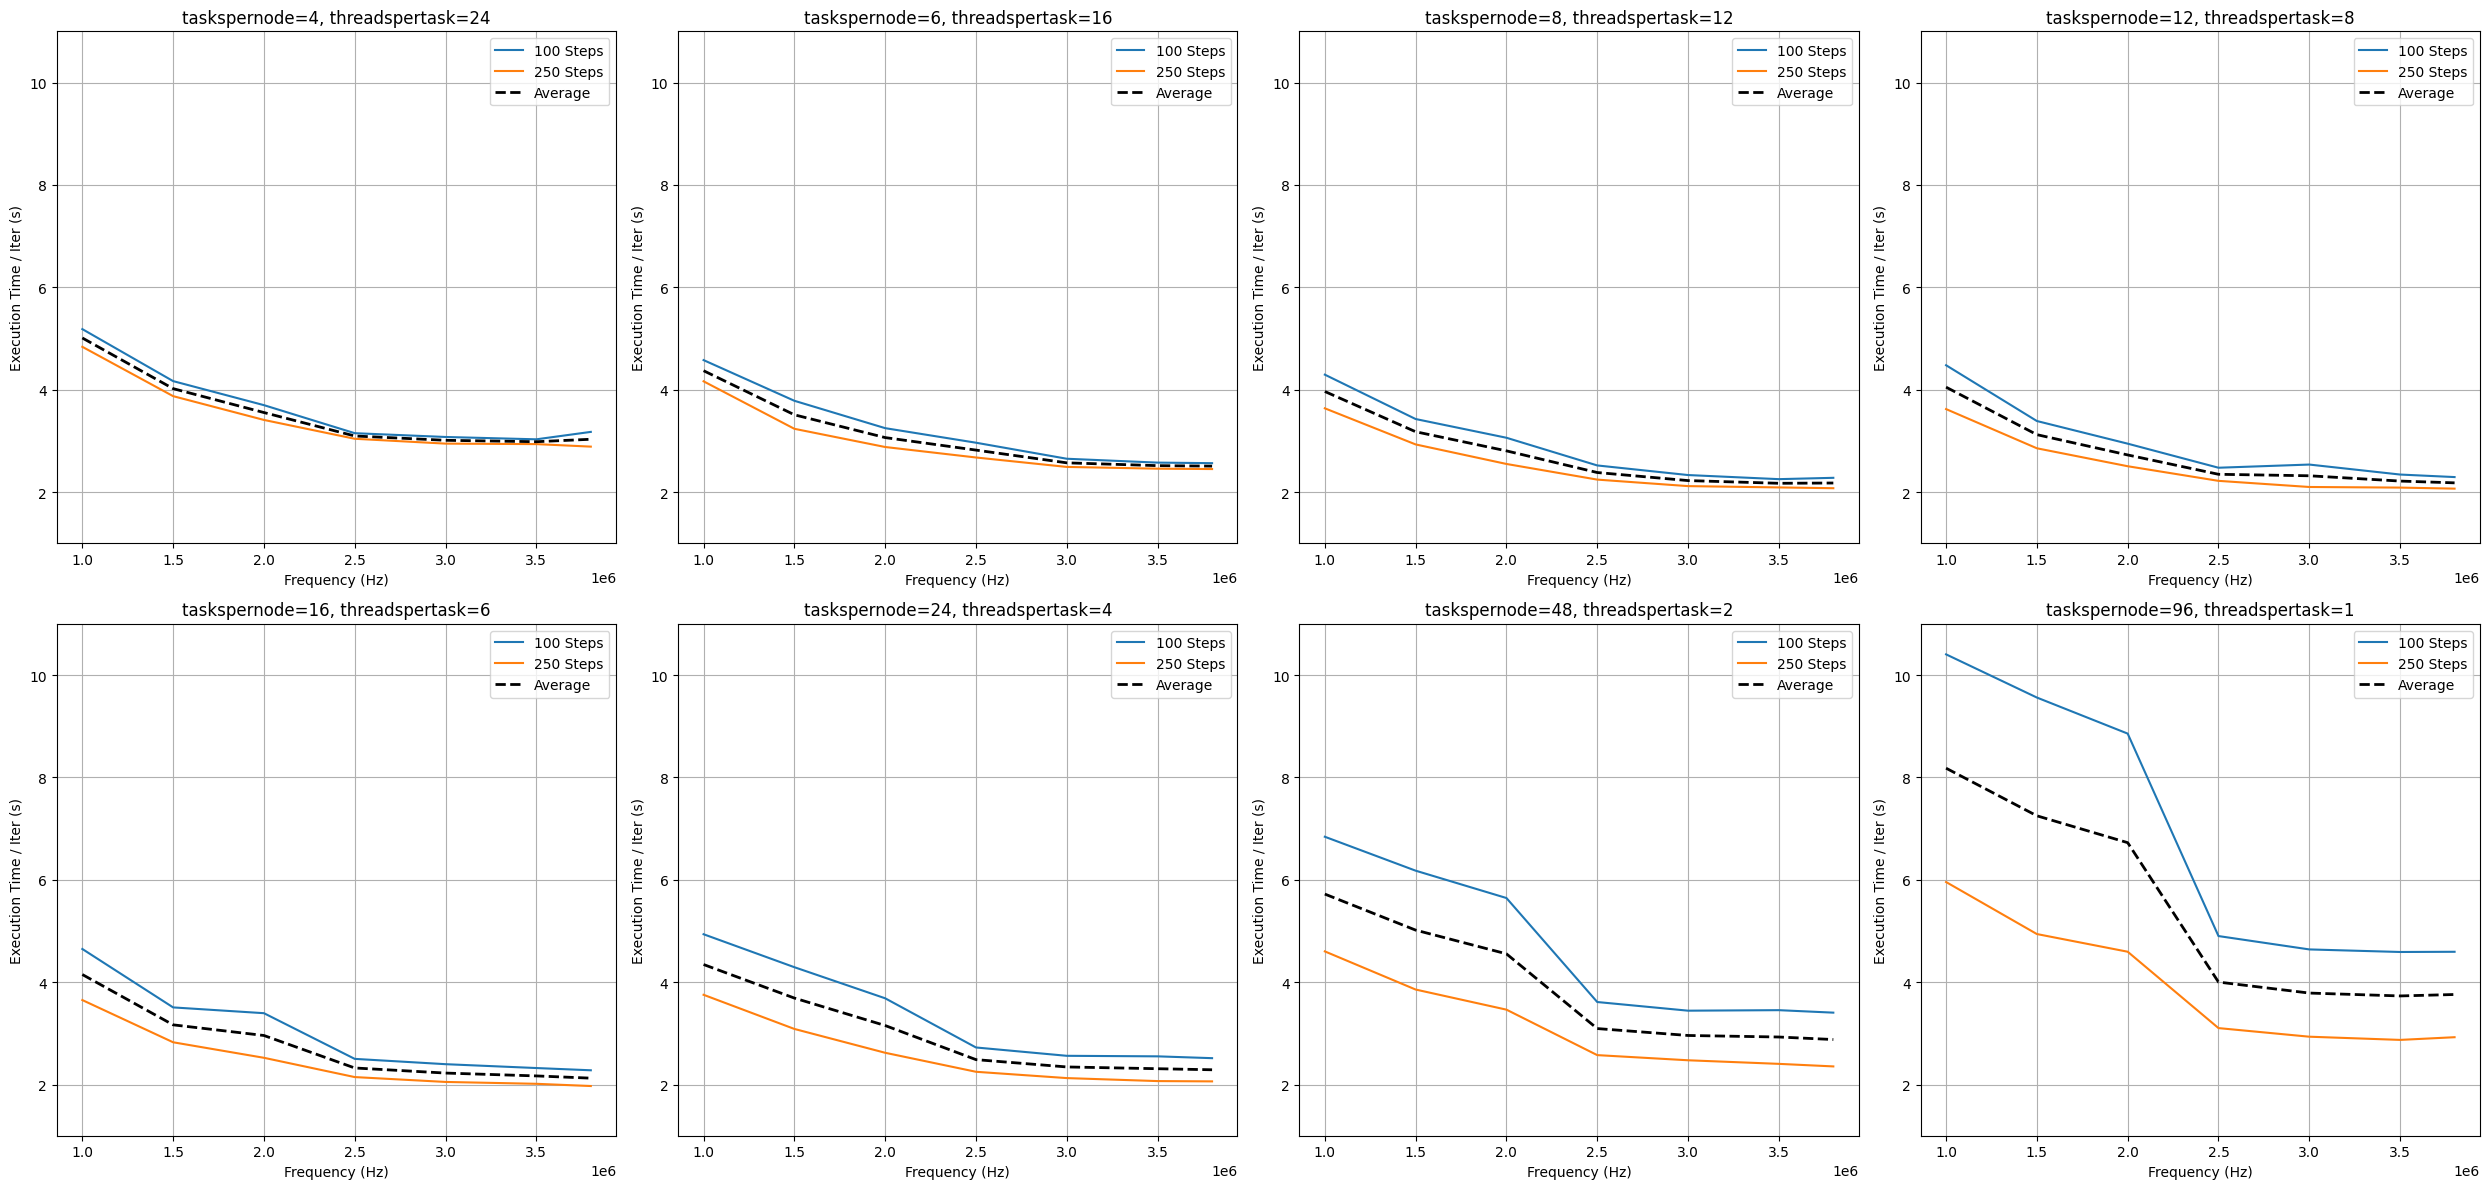

[SAVED] ../results/multisocket/icon_runtime_annotated_time


In [13]:
fig, axs = plt.subplots(nrows, ncols, figsize=(25, 6 * nrows), squeeze=False)
outpath = "../results/multisocket/icon_runtime_annotated_time"

runtime_data = {}
for t_idx, task in enumerate(tasks):
    col = t_idx % ncols
    row = t_idx // ncols

    cpufreqs = sorted(df_without_overflow.loc[df_without_overflow["taskspernode"] == task, "cpufreq"].unique())
    if len(cpufreqs) == 0:
        cpufreqs = sorted(df.loc[df["taskspernode"] == task, "cpufreq"].unique())
    cpufreqs = np.array(cpufreqs)

    # base_rt_df = df[(df["taskspernode"] == task) & (df["iconsteps"] == 1)]
    # base_runtime = aligned_values_from_df(base_rt_df, cpufreqs, "total_time")

    base_runtime = []
    for f in cpufreqs:
        path = f"../data/multisocket/icon_reports/{task}_ranks_{96 // task}_threads_{f}_hz_1_steps.csv"
        if os.path.exists(path):
            df_single = pd.read_csv(path)
            total_runtime = df_single.groupby("socket")["total_runtime"].max().sum()
            base_runtime.append(total_runtime)
        else:
            print(f"[WARN] No report for task={task} cpufreq={f} steps=1")
            base_runtime.append(np.nan)
    base_runtime = np.array(base_runtime)

    runtime_store = {}
    for step in icon_steps_all:
        if step == 1:
            continue
        step_df = df[(df["taskspernode"] == task) & (df["iconsteps"] == step)]
        total_time_arr = aligned_values_from_df(step_df, cpufreqs, "total_time")

        if np.isnan(base_runtime).any() or np.isnan(total_time_arr).any():
            continue

        runtime_per_iter = (total_time_arr - base_runtime) / (step - 1)
        runtime_store[step] = runtime_per_iter
        axs[row, col].plot(cpufreqs, runtime_per_iter, label=f"{step} Steps")

    runtime_data[task] = runtime_store
    
    if all(s in runtime_store for s in avg_steps):
        y_avg = np.mean(np.vstack([runtime_store[s] for s in avg_steps]), axis=0)
        axs[row, col].plot(cpufreqs, y_avg, linestyle="--", linewidth=2, color="k", label=f"Average")

    axs[row, col].set_title(f'taskspernode={task}, threadspertask={96//task}')
    axs[row, col].set_xlabel('Frequency (Hz)')
    axs[row, col].set_ylabel('Execution Time / Iter (s)')
    axs[row, col].set_ylim([1, 11])
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.savefig(outpath, dpi=300)
plt.show()
print(f"[SAVED] {outpath}")

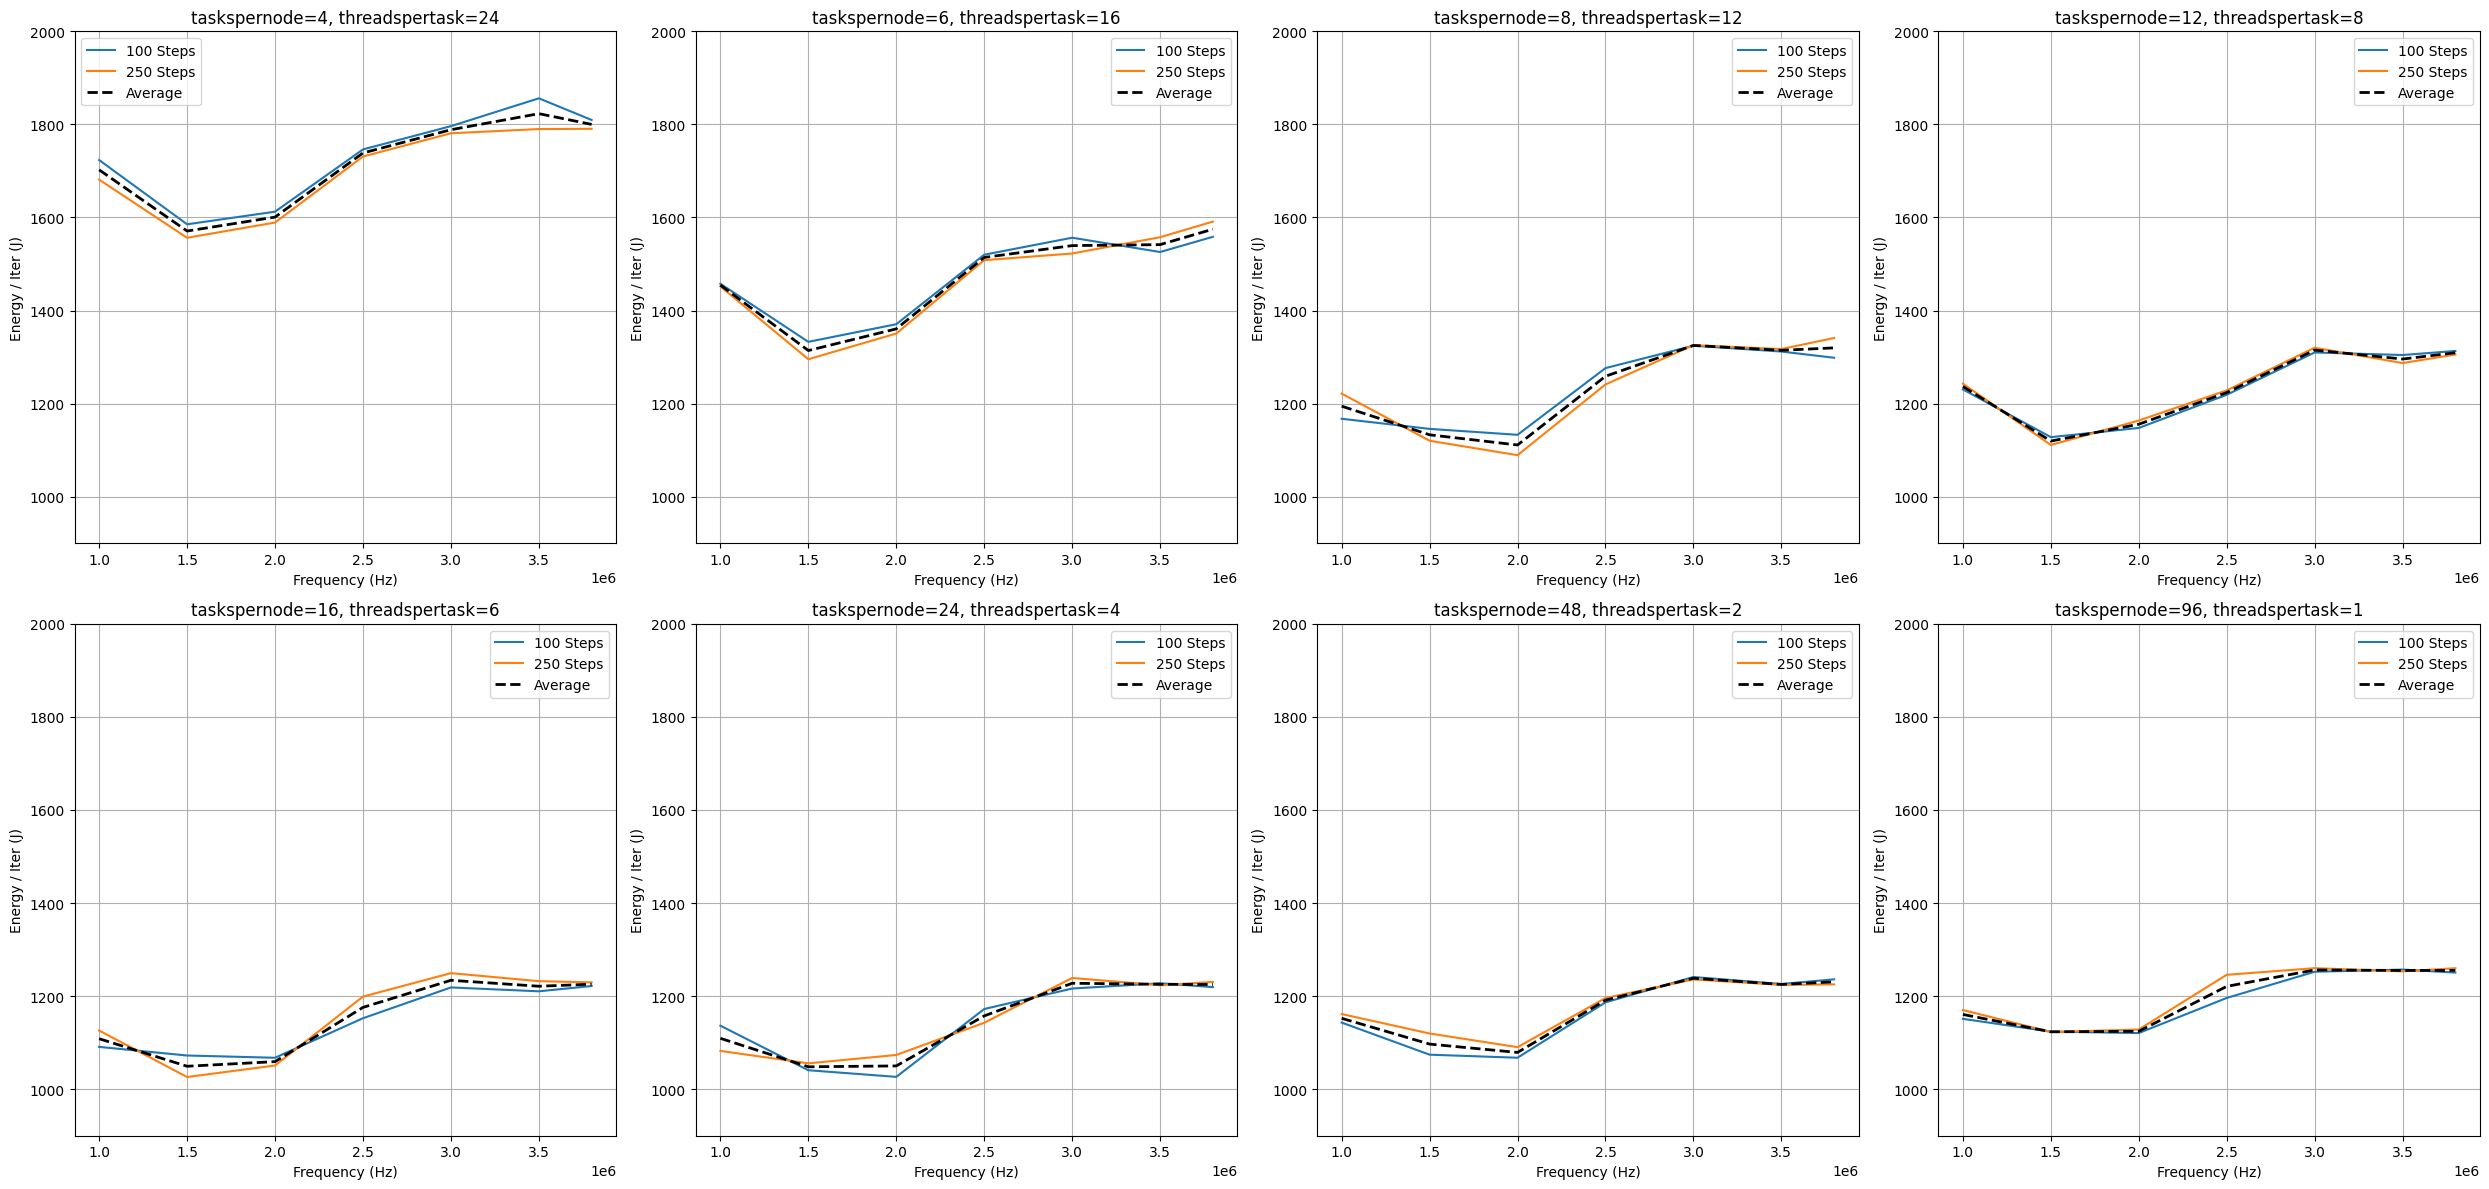

[SAVED] ../results/multisocket/icon_energy


In [14]:
fig, axs = plt.subplots(nrows, ncols, figsize=(25, 6 * nrows), squeeze=False)
outpath = "../results/multisocket/icon_energy"

energy_data = {}
for t_idx, task in enumerate(tasks):
    col = t_idx % ncols
    row = t_idx // ncols

    cpufreqs = sorted(df_without_overflow.loc[df_without_overflow["taskspernode"] == task, "cpufreq"].unique())
    if len(cpufreqs) == 0:
        cpufreqs = sorted(df.loc[df["taskspernode"] == task, "cpufreq"].unique())
    cpufreqs = np.array(cpufreqs)

    base_energy = []
    for f in cpufreqs:
        path = f"../data/multisocket/icon_reports/{task}_ranks_{96 // task}_threads_{f}_hz_1_steps.csv"
        if os.path.exists(path):
            df_single = pd.read_csv(path)
            total_energy = df_single.groupby("socket")["total_energy"].max().sum()
            base_energy.append(total_energy)
        else:
            print(f"[WARN] No report for task={task} cpufreq={f} steps=1")
            base_energy.append(np.nan)
    base_energy = np.array(base_energy)

    energy_store = {}
    for step in icon_steps_all:
        if step == 1:
            continue

        total_energy_list = []
        for f in cpufreqs:
            path = f"../data/multisocket/icon_reports/{task}_ranks_{96 // task}_threads_{f}_hz_{step}_steps.csv"
            if os.path.exists(path):
                df_single = pd.read_csv(path)
                total_energy = df_single.groupby("socket")["total_energy"].max().sum()
                total_energy_list.append(total_energy)
            else:
                print(f"[WARN] No report for task={task} cpufreq={f} steps={step}")
                total_energy_list.append(np.nan)

        total_energy_arr = np.array(total_energy_list)
        if np.isnan(base_energy).any() or np.isnan(total_energy_arr).any():
            continue

        energy_per_iter = (total_energy_arr - base_energy) / (step - 1)
        energy_store[step] = energy_per_iter
        axs[row, col].plot(cpufreqs, energy_per_iter, label=f"{step} Steps")
        
    energy_data[task] = energy_store
    
    if all(s in energy_store for s in avg_steps):
        y_avg = np.mean(np.vstack([energy_store[s] for s in avg_steps]), axis=0)
        axs[row, col].plot(cpufreqs, y_avg, linestyle="--", linewidth=2, color="k", label=f"Average")

    axs[row, col].set_title(f'taskspernode={task}, threadspertask={96//task}')
    axs[row, col].set_xlabel('Frequency (Hz)')
    axs[row, col].set_ylabel('Energy / Iter (J)')
    axs[row, col].set_ylim([900, 2000])
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.savefig(outpath, dpi=300)
plt.show()
print(f"[SAVED] {outpath}")

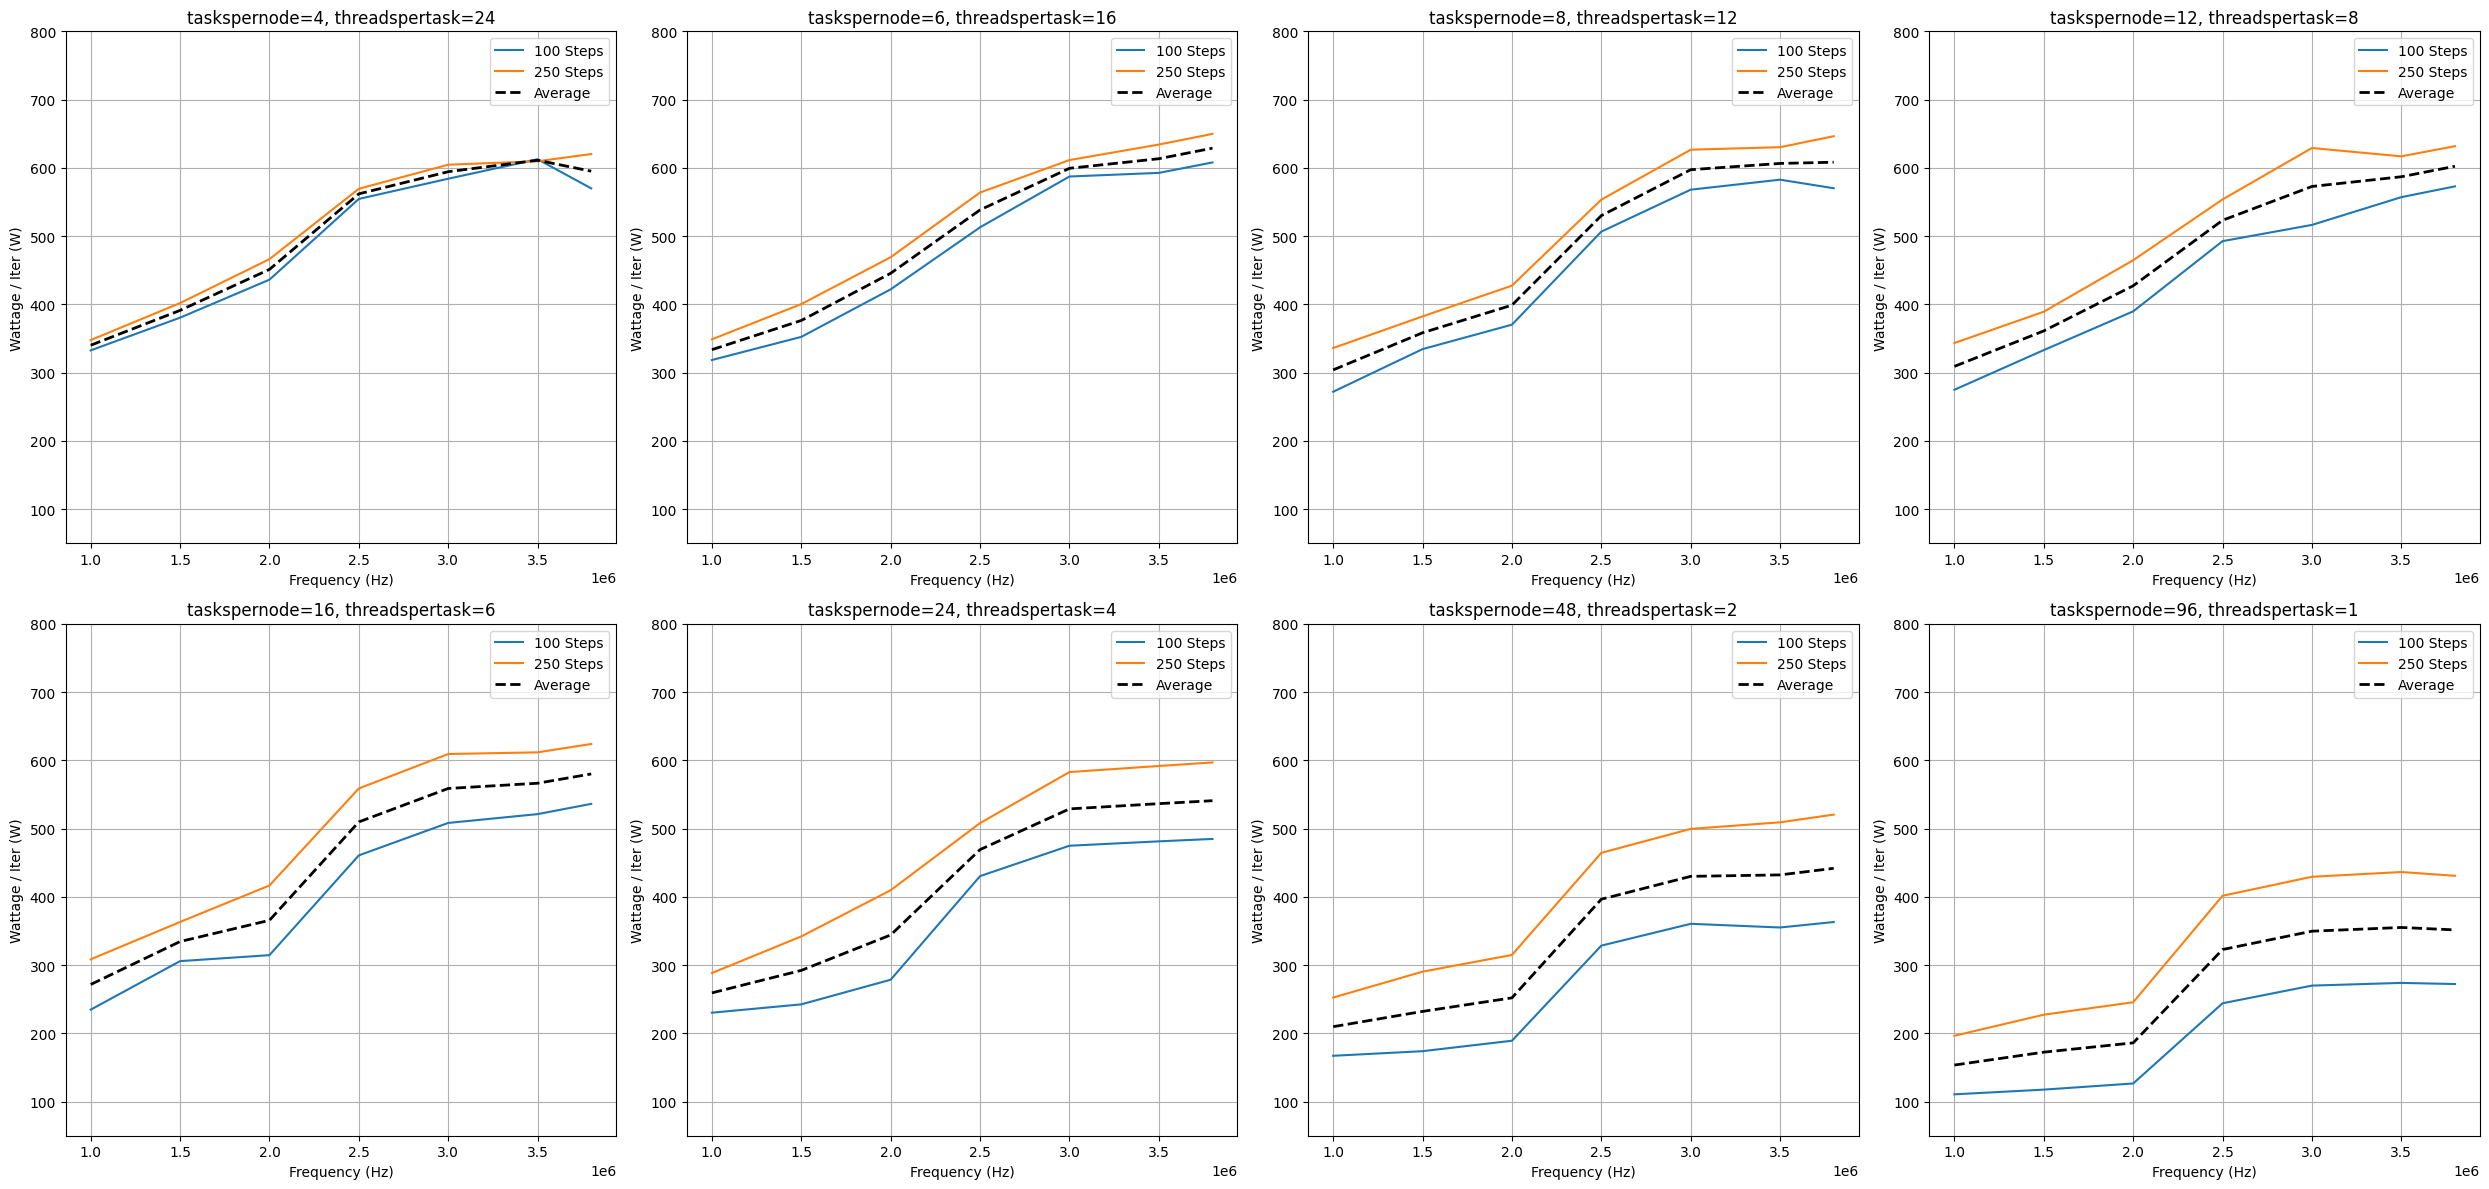

[SAVED] ../results/multisocket/icon_wattage_annotated_time


In [15]:
fig, axs = plt.subplots(nrows, ncols, figsize=(25, 6 * nrows), squeeze=False)
outpath = "../results/multisocket/icon_wattage_annotated_time"

for t_idx, task in enumerate(tasks):
    col = t_idx % ncols
    row = t_idx // ncols

    cpufreqs = sorted(df_without_overflow.loc[df_without_overflow["taskspernode"] == task, "cpufreq"].unique())
    if len(cpufreqs) == 0:
        cpufreqs = sorted(df.loc[df["taskspernode"] == task, "cpufreq"].unique())
    cpufreqs = np.array(cpufreqs)

    wattage_store = {}
    for step in sorted(set(runtime_data[task].keys()).intersection(set(energy_data[task].keys()))):
        rt = np.array(runtime_data[task][step], dtype=float)
        en = np.array(energy_data[task][step], dtype=float)
        with np.errstate(divide='ignore', invalid='ignore'):
            watt = np.where(rt > 0, en / rt, np.nan)
        wattage_store[step] = watt
        axs[row, col].plot(cpufreqs, watt, label=f"{step} Steps")

    if all(s in wattage_store for s in avg_steps):
        y_avg_w = np.mean(np.vstack([wattage_store[s] for s in avg_steps]), axis=0)
        axs[row, col].plot(cpufreqs, y_avg_w, linestyle="--", linewidth=2, color="k", label="Average")
    else:
        found = [s for s in avg_steps if s in wattage_store]

    axs[row, col].set_title(f'taskspernode={task}, threadspertask={96//task}')
    axs[row, col].set_xlabel('Frequency (Hz)')
    axs[row, col].set_ylabel('Wattage / Iter (W)')
    axs[row, col].set_ylim([50, 800])
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.savefig(outpath, dpi=300)
plt.show()
print(f"[SAVED] {outpath}")

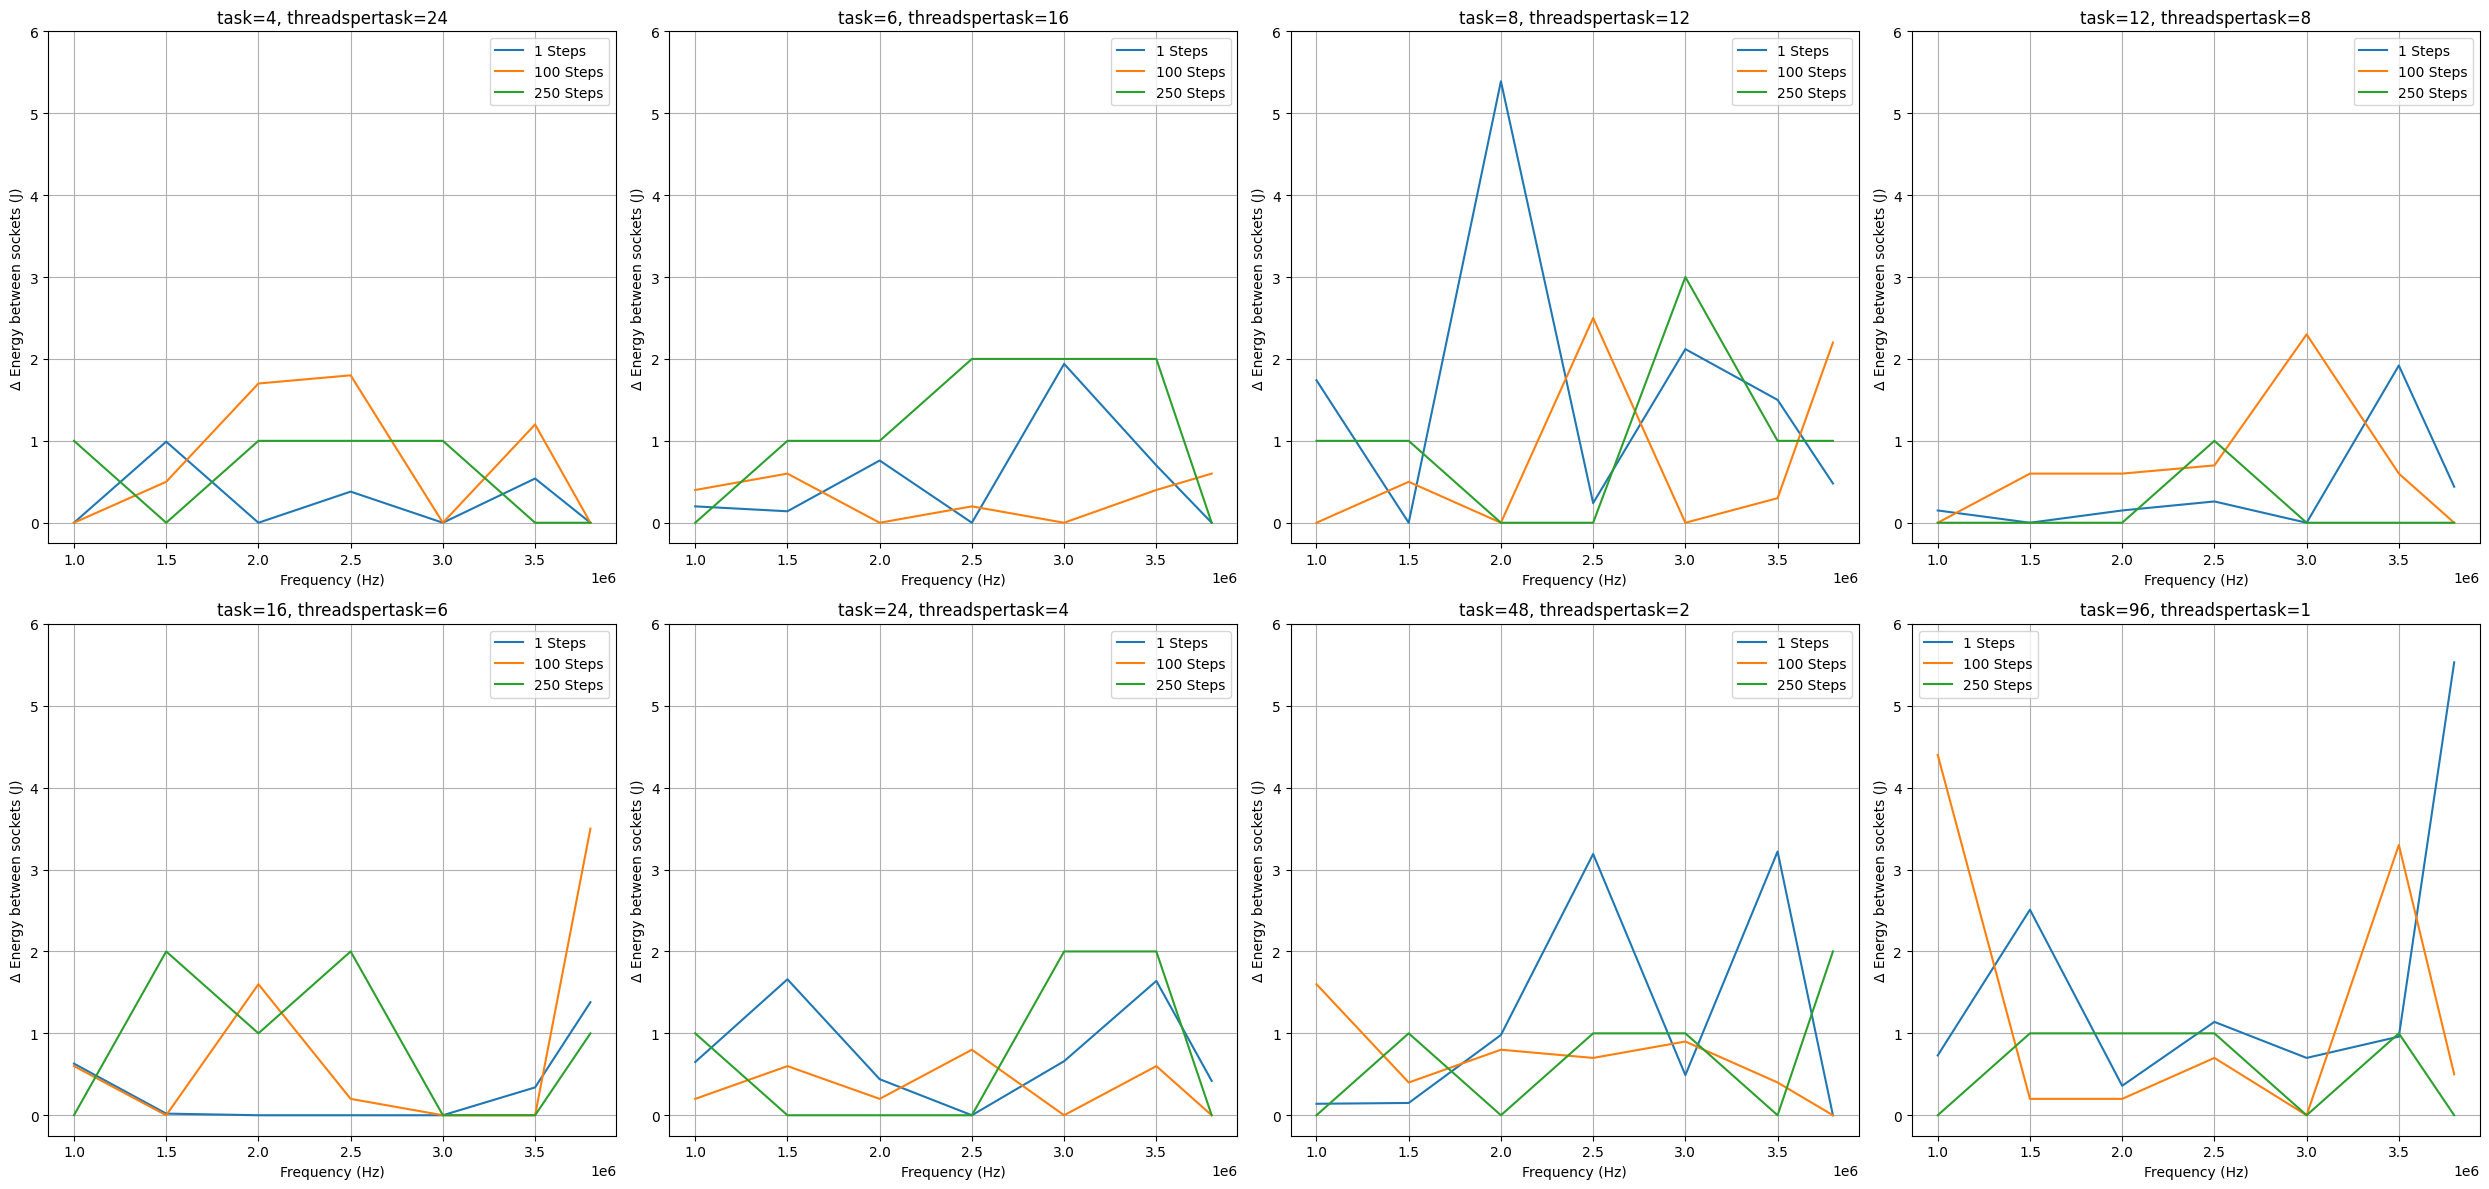

[SAVED] ../results/multisocket/icon_socket_energy_diff.png


In [16]:
fig, axs = plt.subplots(nrows, ncols, figsize=(25, 6 * nrows), squeeze=False)
outpath = "../results/multisocket/icon_socket_energy_diff.png"

diff_norm_store = {}

for t_idx, task in enumerate(tasks):
    col = t_idx % ncols
    row = t_idx // ncols

    cpufreqs = sorted(df_without_overflow.loc[df_without_overflow["taskspernode"] == task, "cpufreq"].unique())
    if len(cpufreqs) == 0:
        cpufreqs = sorted(df.loc[df["taskspernode"] == task, "cpufreq"].unique())
    cpufreqs = np.array(cpufreqs)

    diff_store = {}
    diff_norm_store_per_task = {}

    for step in icon_steps_all:
        diff_vals = []
        diff_norm_vals = []

        for f in cpufreqs:
            path = f"../data/multisocket/icon_reports/{task}_ranks_{96 // task}_threads_{f}_hz_{step}_steps.csv"
            if not os.path.exists(path):
                print(f"[WARN] No report for task={task} cpufreq={f} steps={step}")
                diff_vals.append(np.nan)
                diff_norm_vals.append(np.nan)
                continue

            df_single = pd.read_csv(path)
            if "socket" not in df_single.columns:
                print(f"[WARN] No socket info for task={task} cpufreq={f} steps={step}")
                diff_vals.append(np.nan)
                diff_norm_vals.append(np.nan)
                continue

            socket_energy = df_single.groupby("socket")["total_energy"].max()
            diff = abs(socket_energy.iloc[0] - socket_energy.iloc[1])
            # Normalized Difference (Asymmetry)
            norm_diff = (socket_energy.iloc[0] - socket_energy.iloc[1]) / socket_energy.mean() * 100
            diff_vals.append(diff)
            diff_norm_vals.append(norm_diff)

        diff_store[step] = np.array(diff_vals)
        diff_norm_store_per_task[step] = np.array(diff_norm_vals)
        
        axs[row, col].plot(cpufreqs, diff_store[step], label=f"{step} Steps")

    diff_norm_store[task] = diff_norm_store_per_task
    axs[row, col].set_title(f"task={task}, threadspertask={96//task}")
    axs[row, col].set_xlabel("Frequency (Hz)")
    axs[row, col].set_ylabel("Δ Energy between sockets (J)")
    axs[row, col].set_ylim([-0.25, 6])
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.savefig(outpath, dpi=300)
plt.show()
print(f"[SAVED] {outpath}")

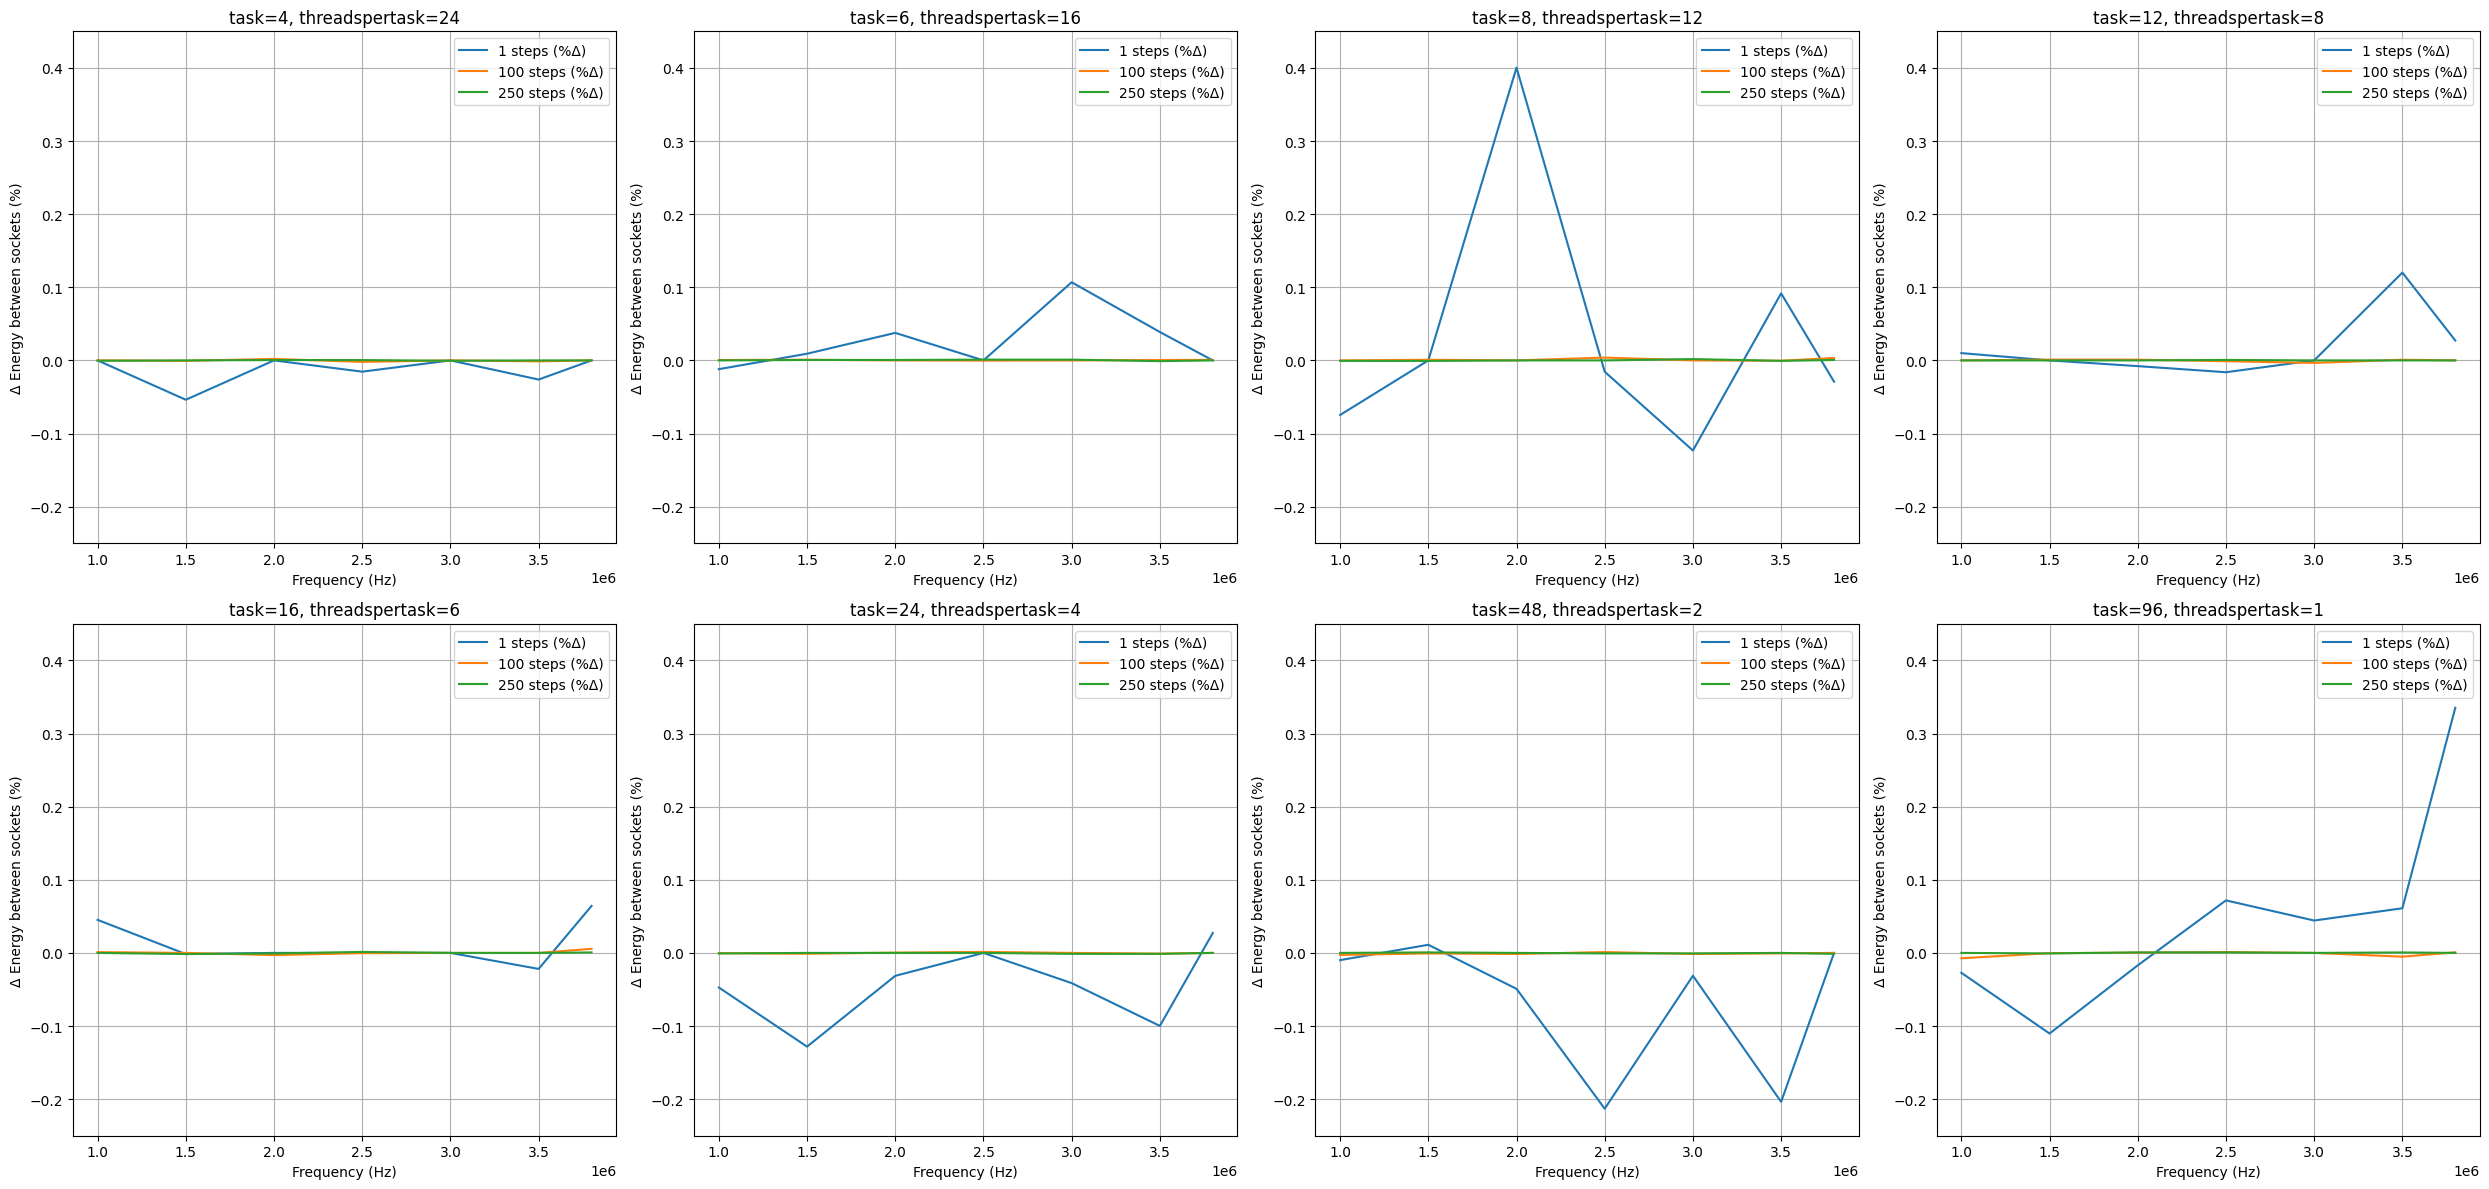

[SAVED] ../results/multisocket/icon_socket_energy_diff_percent.png


In [17]:
fig, axs = plt.subplots(nrows, ncols, figsize=(25, 6 * nrows), squeeze=False)
outpath = "../results/multisocket/icon_socket_energy_diff_percent.png"

for t_idx, task in enumerate(tasks):
    col = t_idx % ncols
    row = t_idx // ncols
    cpufreqs = sorted(df_without_overflow.loc[df_without_overflow["taskspernode"] == task, "cpufreq"].unique())
    if len(cpufreqs) == 0:
        cpufreqs = sorted(df.loc[df["taskspernode"] == task, "cpufreq"].unique())
    cpufreqs = np.array(cpufreqs)

    for step in icon_steps_all:
        if step not in diff_norm_store[task]:
            continue
        axs[row, col].plot(cpufreqs, diff_norm_store[task][step], label=f"{step} steps (%Δ)")

    axs[row, col].set_title(f"task={task}, threadspertask={96//task}")
    axs[row, col].set_xlabel("Frequency (Hz)")
    axs[row, col].set_ylabel("Δ Energy between sockets (%)")
    axs[row, col].set_ylim([-0.25, 0.45])
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.savefig(outpath, dpi=300)
plt.show()
print(f"[SAVED] {outpath}")